In [153]:
import numpy as np
import time
import matplotlib
from matplotlib  import pyplot as plt
from matplotlib  import pyplot as plt
from IPython.display import display, clear_output

FOR THIS PROJECT, WE WILL USE THE UNIT WHERE EVERY CONSTANT IS 1

# PROBLEM 1

In [18]:
# Initial Condition for a single mass at rest
n = 1 # number of particles
G = 1 # gravity strength

# Grid parameters
L = 2**6 #fasted as powers of 2 cause fourier stuff
x1 = np.arange(L//2+1)
x2 = x1[::-1][:-1]
x = np.concatenate((x2,x1))

In [20]:
# Parameters for the particles
m = np.zeros(n) + 1 # All the mass value will be 1
pos = L*np.random.rand(n,2)
v = pos*0 # All initial velocity will be 0

In [117]:
# The green fuction for a problem
def green(pos, L, x, soft):
    rho = np.histogram2d(pos[:,0], pos[:,1], bins = L,range = [[0, L], [0, L]])[0]   
    Vone = rho*0
    for i in range(L):
        for j in range(L):
            r = np.sqrt(x[i]**2+x[j]**2)
            if r<soft: #sofenting if they are close to each other
                r = soft
            Vone[i,j] = G/r

    VoneF = np.fft.fft2(Vone)
    rhoF = np.fft.fft2(rho)
    VF = VoneF*rhoF
    V = np.abs(np.fft.fftshift(np.fft.ifft2(VF))) #getting global pottential by convolving potential and density
    F = np.gradient(V) 
    return rho, Vone, VoneF, rhoF, VF, V, F

In [118]:
# Using the Green function to find all variables
soft = 0.5
rho, Vone, VoneF, rhoF, VF, V, F = green(pos, L, x, soft)

In [25]:
# Leapfrog algorithm for the evolution with non_periodic boundary condition
def evolve_non_periodic(pos, v, num, dt, display):
    vhalf = v.copy() #for the leapfrog step
    n = len(pos[:,0])
    rho, x, y = np.histogram2d(pos[:,0], pos[:,1], bins = L, range = [[0, L], [0, L]])
    rhoF = np.fft.fft2(rho)
    VF = VoneF*rhoF 
    V = np.abs(np.fft.fftshift(np.fft.ifft2(VF)))
    F = np.gradient(V)
    E1 = 0 # calculating the energy at the begining
    E1 = np.sum(V)
    E1 += np.sum(0.5*m[:]*(v[:,0]**2 + v[:,1]**2))
    for iteration in range(num):
        for i in range(n):
            if 0<pos[i,0]<L and 0<pos[i,1]<L: # for when particles leave the grid
                vhalf[i,0] = v[i,0] + (F[0][pos[i,0].astype(int),pos[i,1].astype(int)]/m[i])*(dt/2)
                vhalf[i,1] = v[i,1]+(F[1][pos[i,0].astype(int),pos[i,1].astype(int)]/m[i])*(dt/2)
        pos = pos+vhalf*dt
        rho = np.histogram2d(pos[:,0],pos[:,1],bins=L,range=[[0, L], [0, L]])[0]
        rhoF = np.fft.fft2(rho)
        VF = VoneF*rhoF
        V = np.abs(np.fft.fftshift(np.fft.ifft2(VF)))
        F = np.gradient(V)
        for i in range(n):
            if 0<pos[i,0]<L and 0<pos[i,1]<L:
                v[i,0] = vhalf[i,0]+(F[0][pos[i,0].astype(int), pos[i,1].astype(int)]/m[i])*(dt/2)
                v[i,1] = vhalf[i,1]+(F[1][pos[i,0].astype(int), pos[i,1].astype(int)]/m[i])*(dt/2)
                
        #THIS SECTION IS TO DISPLAY THE EVOLUTION 
        if display & (iteration%4 == 0):
            #print(iteration)        
            plt.imshow(rho,cmap = plt.cm.hot)
            plt.colorbar()
            clear_output(wait = True)
            plt.pause(0.00000001)
        
    plt.imshow(rho, cmap = plt.cm.hot)
    plt.colorbar()
    plt.title('Final Orientation')
    clear_output(wait = True)
    E = 0
    E = np.sum(V)
    E += np.sum(0.5*m[:]*(v[:,0]**2 + v[:,1]**2))
    print('The initial energy is: ',E1)
    print('The final energy is: ',E)
    return pos,v

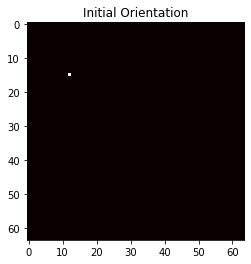

In [26]:
plt.imshow(rho, cmap = plt.cm.hot)
plt.title('Initial Orientation')
plt.show()

The starting energy is:  223.7166431943275
The final energy is:  223.7166431943275
Starting Position is: [[15.40596702 12.58405763]]
Final Position is: [[15.40596702 12.58405763]]


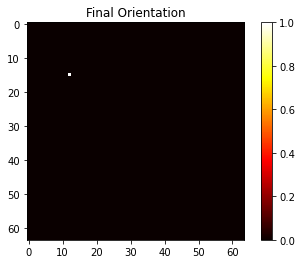

In [28]:
dt = 0.1
posFin, v = evolve_non_periodic(pos, v, 1000, dt, False) #True/False to display the evolution
print('Starting Position is:', pos)
print('Final Position is:', posFin)

# PROBLEM 2

In [29]:
# Initial Condition for 2 single mass interacting with each other
n = 2 # number of particles
G = 10 # gravity strength (making it stronger so that the effect is more prominent)

# Grid parameters
L = 2**6 #fasted as powers of 2 cause fourier stuff
x1 = np.arange(L//2+1)
x2 = x1[::-1][:-1]
x = np.concatenate((x2,x1))

In [30]:
# Mass parameters
m = np.zeros(n)+1
pos = np.zeros([n,2])

pos[0,1]=7*L/16
pos[1,1]=9*L/16
pos[:,0]=L/2

v=pos*0
v[1,0]=-1
v[0,0]=1

In [119]:
# Finding all variables
soft = 0.05
rho, Vone, VoneF, rhoF, VF, V, F = green(pos, L, x, soft)

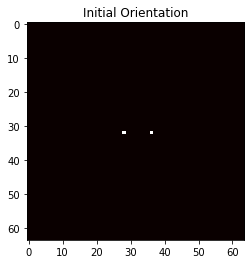

In [33]:
plt.imshow(rho,cmap = plt.cm.hot)
plt.title('Initial Orientation')
plt.show()

The starting energy is:  4835.33286388655
The final energy is:  4835.122523124483
Starting Position is: [[32. 28.]
 [32. 36.]]
Final Position is: [[28.24509643 29.12090381]
 [35.75490357 34.87909619]]


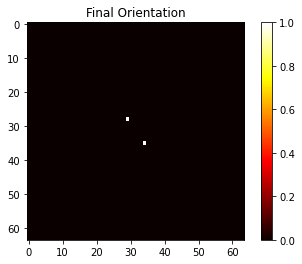

In [34]:
dt = 0.1
posFin, v = evolve_non_periodic(pos, v, 1000, dt, False) #True/False to display the evolution
print('Starting Position is:', pos)
print('Final Position is:', posFin)

After a reasonalby long period of time, the particles are still orbiting each other, precisely what we want.

# PROBLEM 3

# Non Periodic Boundary Condition

In [56]:
# Setting up 
n = 100000
G = 10


# Grid Parameters
L = 2**9 #fasted as powers of 2 cause fourier stuff
x1 = np.arange(L//2+1)
x2 = x1[::-1][:-1]
x = np.concatenate((x2,x1))


In [57]:
# Mass parameters
m = np.zeros(n)+1
pos = L*np.random.rand(n,2)
v = pos*0

In [58]:
# Finding all variables
soft = 1.01
rho, Vone, VoneF, rhoF, VF, V, F = green(pos, L, x, soft)

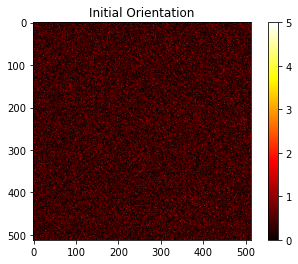

In [37]:
plt.imshow(rho,cmap = plt.cm.hot)
plt.title('Initial Orientation')
plt.colorbar()
plt.show()

The starting energy is:  1916003389.0759184
The final energy is:  1768055668.7454247


290.1314809322357

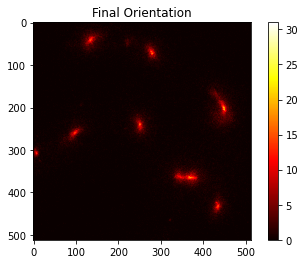

In [54]:
dt = 0.01
t2 = time.time()
pos, v = evolve_non_periodic(pos, v, 200, dt, False) #True/False to display the evolution
print('Elapsed time: ', time.time() - t2)

# Periodic Boundary Condition

In [120]:
# Setting up our intial condtions for n particles
n = 100000
G = 5

# Grid Parameters
L = 2**9 #fasted as powers of 2 cause fourier stuff
x1 = np.arange(L//2 + 1)
x2 = x1[::-1][:-1]
x = np.concatenate((x2,x1))

In [121]:
# Mass parameters
m = np.zeros(n) + 1
pos = L*np.random.rand(n,2)
v = pos*0

In [122]:
# Finding all variables
soft = 1.01
rho, Vone, VoneF, rhoF, VF, V, F = green(pos, L, x, soft)

In [80]:
# Leapfrog algorithm for the evolution with periodic boundary condition
def evolve_periodic(pos, v, num, dt, display):
    vhalf = v.copy()
    n = len(pos[:,0])
    rho, x, y = np.histogram2d(pos[:,0], pos[:,1], bins = L, range =[[0, L], [0, L]])
    rhoF = np.fft.fft2(rho)
    VF = VoneF*rhoF
    V = np.abs(np.fft.fftshift(np.fft.ifft2(VF)))
    F = np.gradient(V)
    E1 = 0
    E1 = np.sum(V)
    E1 += np.sum(0.5*m[:]*(v[:,0]**2 + v[:,1]**2))
    for iteration in range(num):
        for i in range(2):
            vhalf[:,i] = v[:,i] + (F[i][pos[:,0].astype(int), pos[:,1].astype(int)]/m[:])*(dt/2)
        pos = (pos+vhalf*dt)%L
        rho = np.histogram2d(pos[:,0], pos[:,1], bins = L, range = [[0, L], [0, L]])[0]
        rhoF = np.fft.fft2(rho)
        VF = VoneF*rhoF
        V = np.abs(np.fft.fftshift(np.fft.ifft2(VF)))
        F = np.gradient(V)
        for i in range(2):
            v[:,i] = vhalf[:,i] + (F[i][pos[:,0].astype(int),pos[:,1].astype(int)]/m[:])*(dt/2)
            
        #THIS SECTION IS TO DISPLAY THE EVOLUTION 
        if display & (iteration%4 == 0):
            #print(iteration)        
            plt.imshow(rho,cmap = plt.cm.hot)
            plt.colorbar()
            clear_output(wait = True)
            plt.pause(0.00000001)
            
    plt.imshow(rho,cmap = plt.cm.hot)
    plt.colorbar()
    plt.title('Final Orientation')
    clear_output(wait = True)
    E = 0
    E = np.sum(V)
    E += np.sum(0.5*m[:]*(v[:,0]**2+v[:,1]**2))
    print('The initial energy is: ',E1)
    print('The final energy is: ',E)
    return pos, v

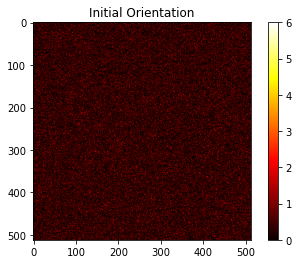

In [81]:
plt.imshow(rho,cmap = plt.cm.hot)
plt.title('Initial Orientation')
plt.colorbar()
plt.show()

The initial energy is:  901050747.4620086
The final energy is:  950191844.3849536
Elapsed time:  34.11424517631531


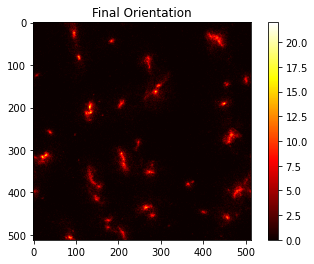

In [82]:
dt = 0.01
t2 = time.time()
pos, v = evolve_periodic(pos, v, 1000, dt, False) #True/False to display the evolution
print('Elapsed time: ', time.time() - t2)

Even though we don't have any particle missing out of the grid, the energy in both cases didn't conserve that well

# PROBLEM 4

In [146]:
# Setting up our intial condtions for n particles
n = 100000
G = 50

# Grid Parameters
L = 2**10 #fasted as powers of 2 cause fourier stuff
x1 = np.arange(L//2 + 1)
x2 = x1[::-1][:-1]
x = np.concatenate((x2,x1))

In [147]:
# Other Parameters
pos = L*np.random.rand(n,2)
v = pos*0
vhalf = v.copy()

In [148]:
# Finding all variables
soft = 1.01
rho, Vone, VoneF, rhoF, VF, V, F = green(pos, L, x, soft)

In [149]:
# Setting up the mass accordingly to fluctations proportinal to k^-3
mF = np.linspace(0,1000,n*2) + 5 + np.random.randn(n*2) # adding noise to the data
mF = 1/(mF**(3)) # proportionality
m = np.abs(np.fft.ifft(mF))
m = m[n//2:-n//2]*10**7 # getting rid of the spike at the end

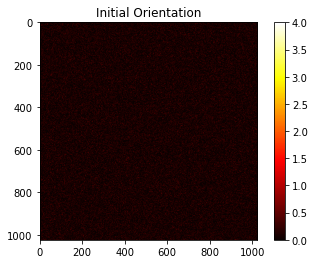

In [151]:
plt.imshow(rho,cmap = plt.cm.hot)
plt.title('Initial Orientation')
plt.colorbar()
plt.show()

The initial energy is:  18035777609.249493
The final energy is:  18398614995.618988


186.21185111999512

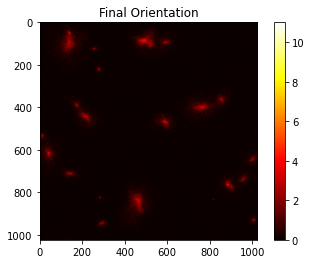

In [152]:
dt = 0.01
t2 = time.time()
pos, v = evolve_periodic(pos, v, 2000, dt, False) #True/False to display the evolutio
print('Elapsed time: ', time.time() - t2)

The particles clump together into local clusters that look like galaxies in our universe. Again, energy is not very well conserved